___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Decision Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifier
- Implement Decision Tree Classifier
- Implement Random Forest Classifier
- Implement XGBoost Classifier
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('treetypes.csv')

In [3]:
df2 = df.copy()

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [5]:
df.shape

(250000, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [8]:
df.isnull().sum().any()

False

In [16]:
df.duplicated().sum()

2521

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(247479, 55)

#### Target Label

In [19]:
df.Cover_Type.value_counts().sort_index()

1    35835
2    35780
3    35273
4    34166
5    35514
6    35430
7    35481
Name: Cover_Type, dtype: int64

Target label is balanced.

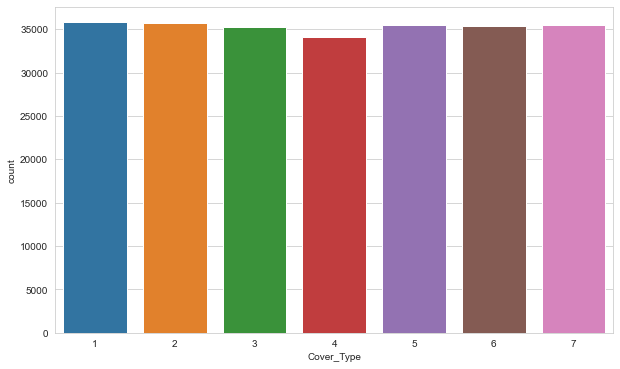

In [20]:
sns.countplot(df.Cover_Type);

In [21]:
# The target label is balanced.

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [23]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [24]:
# To observe the number of outliers depending on the selected parameter k, I can use the below function

def is_outlier(x, k):
    upper = np.quantile(x, 0.75)
    lower = np.quantile(x, 0.25)
    iqr = upper - lower
    a = upper + iqr * k
    b = lower - iqr * k
    if a > x.max():
        a = x.max()
    if b < x.min():
        b = x.min()
    print('-----',x.name,'-----')
    print('Upper Limit: ', a, '\n', 'Lower Limit: ', b, sep='')
    print('Number of outliers in the lower bound:', len(df[x<b]))
    print('Number of outliers in the upper bound:', len(df[x>a]))

- If I decide to drop observations of selected columns depending on a specific parameter of outliers (Tukey's 
parameter is 1.5), I can use the below function.

In [26]:
# def remove_outlier(x, k, ind=0, df_new=None):
#     global df
#     if df_new is not None:
#         df = df_new
#     x = list(x)
#     i = x[ind]
#     upper = np.quantile(df[i], 0.75)
#     lower = np.quantile(df[i], 0.25)
#     iqr = upper - lower
#     a = upper + iqr * k
#     b = lower - iqr * k
#     if a > df[i].max():
#         a = df[i].max()
#     if b < df[i].min():
#         b = df[i].min()
#     df_new = df.loc[(df[i] <= a) & (df[i] >= b)]
#     ind += 1
#     if ind != len(x):
#         return remove_outlier(x, k, ind, df_new)
#     else:
#         return df_new

# remove_outlier(df.columns[:10], 2.5)

#### Elevation

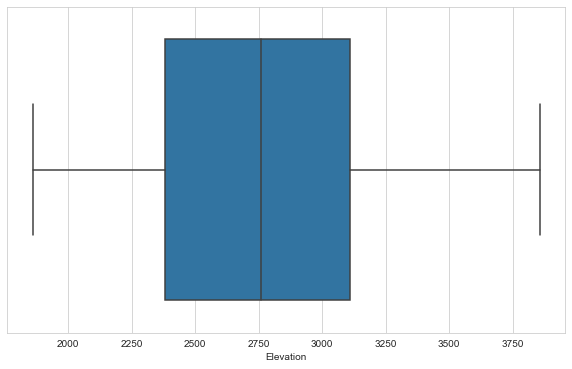

In [31]:
sns.boxplot(df.Elevation);

In [32]:
is_outlier(df.Elevation, 1.5)

----- Elevation -----
Upper Limit: 3857
Lower Limit: 1859
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


#### Aspect

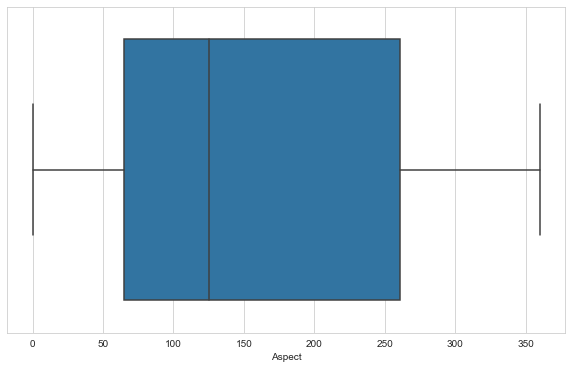

In [33]:
sns.boxplot(df.Aspect);

In [34]:
is_outlier(df.Aspect, 1.5)

----- Aspect -----
Upper Limit: 360
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


#### Slope

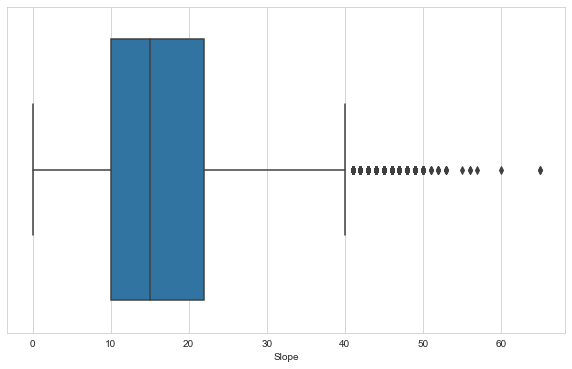

In [35]:
sns.boxplot(df.Slope);

In [36]:
is_outlier(df.Slope, 2)

----- Slope -----
Upper Limit: 46.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 132


In [37]:
df = df[df.Slope <= 46]

#### Horizontal_Distance_To_Hydrology

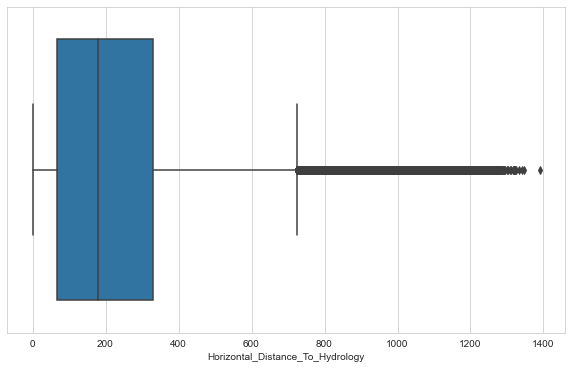

In [38]:
sns.boxplot(df['Horizontal_Distance_To_Hydrology']);

In [39]:
is_outlier(df['Horizontal_Distance_To_Hydrology'], 3)

----- Horizontal_Distance_To_Hydrology -----
Upper Limit: 1119.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 762


In [40]:
# df = df[df['Horizontal_Distance_To_Hydrology'] <= 1122]

#### Vertical_Distance_To_Hydrology

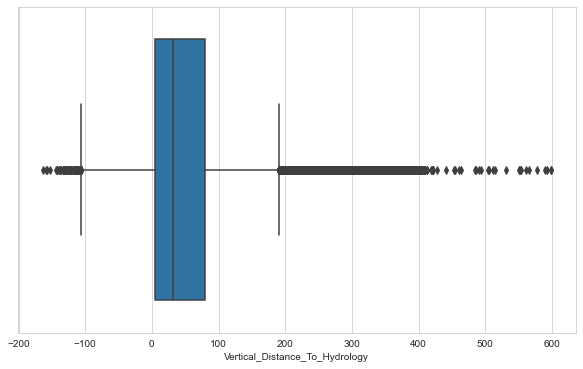

In [41]:
sns.boxplot(df['Vertical_Distance_To_Hydrology']);

In [42]:
is_outlier(df['Vertical_Distance_To_Hydrology'], 3)

----- Vertical_Distance_To_Hydrology -----
Upper Limit: 301.0
Lower Limit: -163
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 956


In [43]:
# df = df[df['Vertical_Distance_To_Hydrology'] <= 301]

In [44]:
df['distance_to_hydrology'] = (df['Horizontal_Distance_To_Hydrology'] ** 2 + 
                               df['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

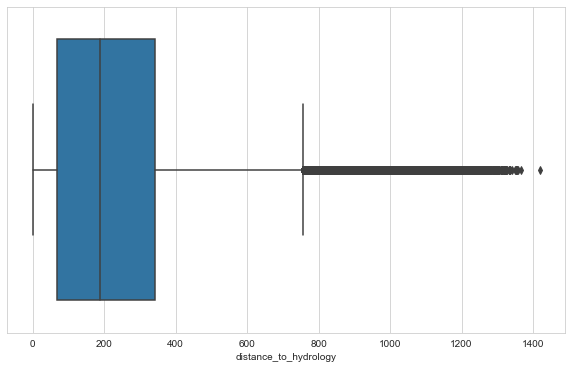

In [45]:
sns.boxplot(df['distance_to_hydrology']);

In [46]:
is_outlier(df['distance_to_hydrology'], 3)

----- distance_to_hydrology -----
Upper Limit: 1170.0193618106764
Lower Limit: 0.0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 497


In [47]:
df = df[df['distance_to_hydrology'] < 1169]

#### Horizontal_Distance_To_Roadways|

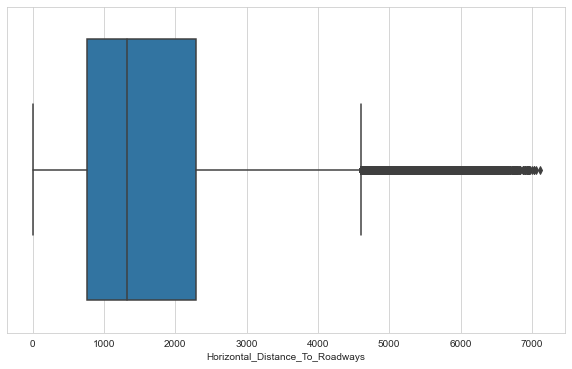

In [48]:
sns.boxplot(df['Horizontal_Distance_To_Roadways']);

In [49]:
is_outlier(df['Horizontal_Distance_To_Roadways'], 3)

----- Horizontal_Distance_To_Roadways -----
Upper Limit: 6917.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 17


In [50]:
# df = df[df['Horizontal_Distance_To_Roadways'] <= 66883]

#### Horizontal_Distance_To_Fire_Points

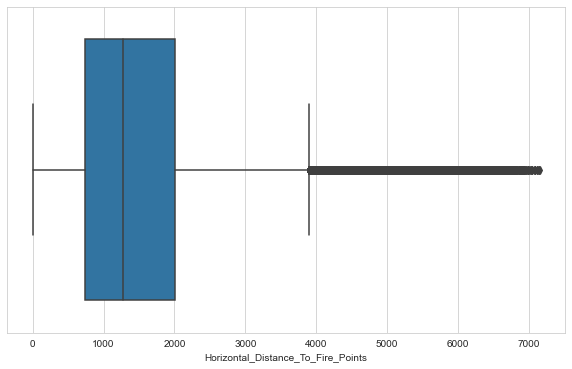

In [51]:
sns.boxplot(df['Horizontal_Distance_To_Fire_Points']);

In [52]:
is_outlier(df['Horizontal_Distance_To_Fire_Points'], 3)

----- Horizontal_Distance_To_Fire_Points -----
Upper Limit: 5799.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 2357


In [53]:
# df = df[df['Horizontal_Distance_To_Fire_Points'] <= 5780 ]

In [54]:
df['distance_to_city'] = (df['Horizontal_Distance_To_Roadways'] + df['Horizontal_Distance_To_Fire_Points']) / 2

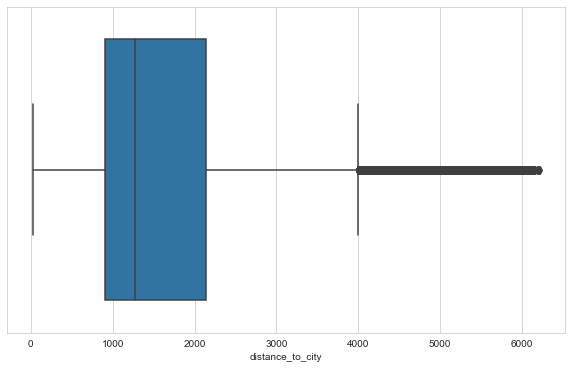

In [55]:
sns.boxplot(df['distance_to_city']);

In [56]:
is_outlier(df['distance_to_city'], 3)

----- distance_to_city -----
Upper Limit: 5854.5
Lower Limit: 21.0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 193


In [57]:
df = df[df['distance_to_city'] < 5825]

#### Hillshade_9am

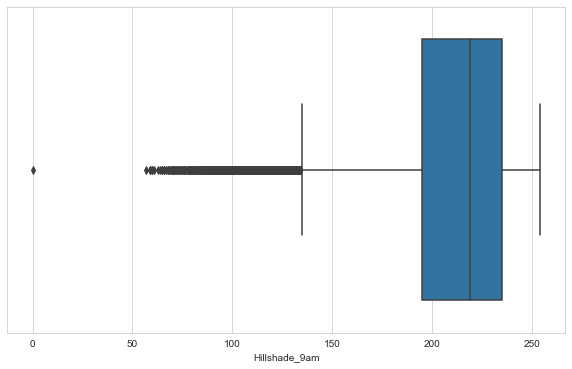

In [58]:
sns.boxplot(df['Hillshade_9am']);

In [59]:
is_outlier(df['Hillshade_9am'], 2.5)

----- Hillshade_9am -----
Upper Limit: 254
Lower Limit: 95.0
Number of outliers in the lower bound: 381
Number of outliers in the upper bound: 0


In [60]:
df = df[df['Hillshade_9am'] >= 95]

#### Hillshade_Noon

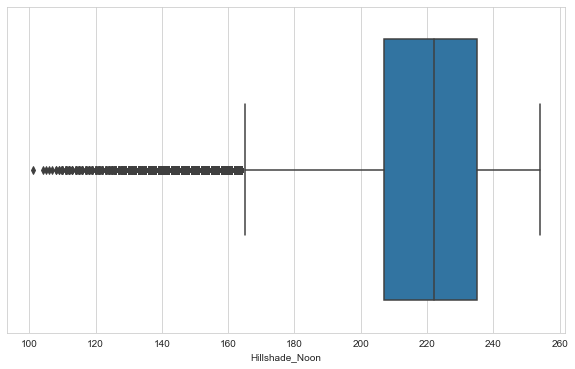

In [61]:
sns.boxplot(df['Hillshade_Noon']);

In [62]:
is_outlier(df['Hillshade_Noon'], 2.5)

----- Hillshade_Noon -----
Upper Limit: 254
Lower Limit: 137.0
Number of outliers in the lower bound: 598
Number of outliers in the upper bound: 0


In [63]:
df = df[df['Hillshade_Noon'] >= 133.5 ]

#### Hillshade_3pm

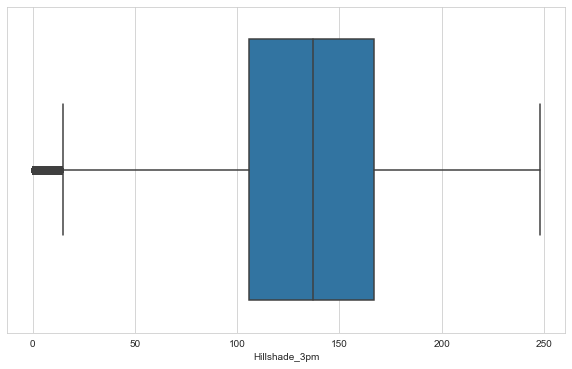

In [64]:
sns.boxplot(df['Hillshade_3pm']);

In [65]:
is_outlier(df['Hillshade_3pm'], 2.5)

----- Hillshade_3pm -----
Upper Limit: 248
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0


### Deal with Outliers

#### *i. Drop Outliers*

In [66]:
# Just dropped above

In [67]:
df.shape

(245770, 57)

In [68]:
df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Horizontal_Distance_To_Fire_Points'], axis=1, inplace=True)

### Now, let's take a closer look at correlation of continuous columns.

In [69]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Wilderness_Area_1', 'Wilderness_Area_2',
       'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2',
       'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
       'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38',
       'Soil_Type_39', 'Soil_Type_40', 'Cover_Type', 'distance_to_hydrology',
       'distance_to_city'],
      dtype='object')

In [70]:
df[['Elevation', 'Aspect', 'Slope','distance_to_hydrology', 'distance_to_city','Hillshade_9am', 'Hillshade_Noon',
   'Hillshade_3pm', 'Cover_Type']].corr()

,Elevation,Aspect,Slope,distance_to_hydrology,distance_to_city,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Cover_Type
Elevation,1.000,-0.023,-0.322,0.400,0.607,0.110,0.226,0.085,0.008
Aspect,-0.023,1.000,0.039,0.038,-0.015,-0.608,0.325,0.639,0.006
Slope,-0.322,0.039,1.000,-0.033,-0.305,-0.186,-0.598,-0.325,0.078
distance_to_hydrology,0.400,0.038,-0.033,1.000,0.177,-0.029,0.067,0.066,0.005
distance_to_city,0.607,-0.015,-0.305,0.177,1.000,0.060,0.214,0.115,-0.118
Hillshade_9am,0.110,-0.608,-0.186,-0.029,0.060,1.000,-0.029,-0.789,-0.021
Hillshade_Noon,0.226,0.325,-0.598,0.067,0.214,-0.029,1.000,0.615,-0.108
Hillshade_3pm,0.085,0.639,-0.325,0.066,0.115,-0.789,0.615,1.000,-0.053
Cover_Type,0.008,0.006,0.078,0.005,-0.118,-0.021,-0.108,-0.053,1.000


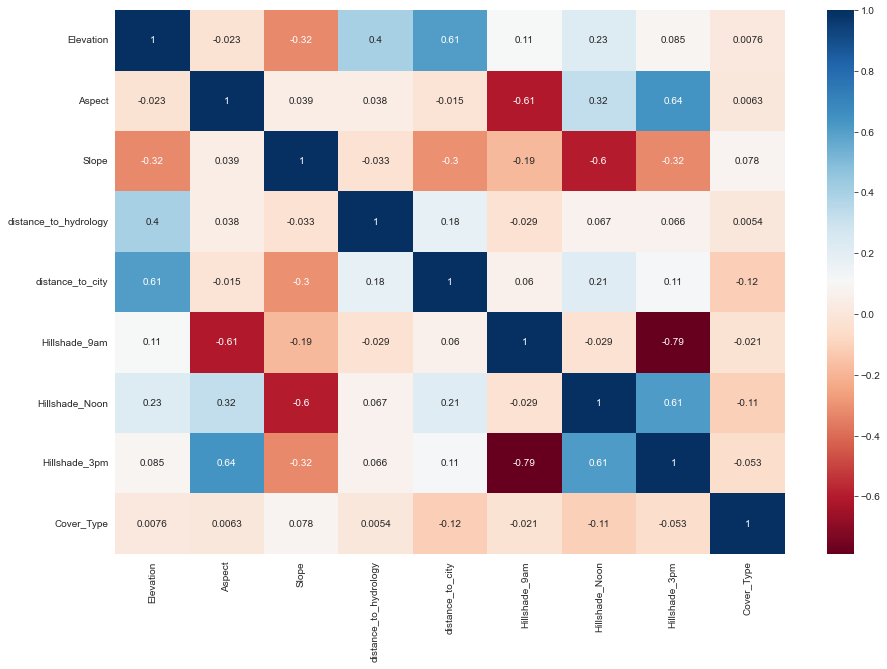

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(df[['Elevation', 'Aspect', 'Slope','distance_to_hydrology', 'distance_to_city','Hillshade_9am', 
               'Hillshade_Noon','Hillshade_3pm', 'Cover_Type']].corr(), annot=True, cmap='RdBu');

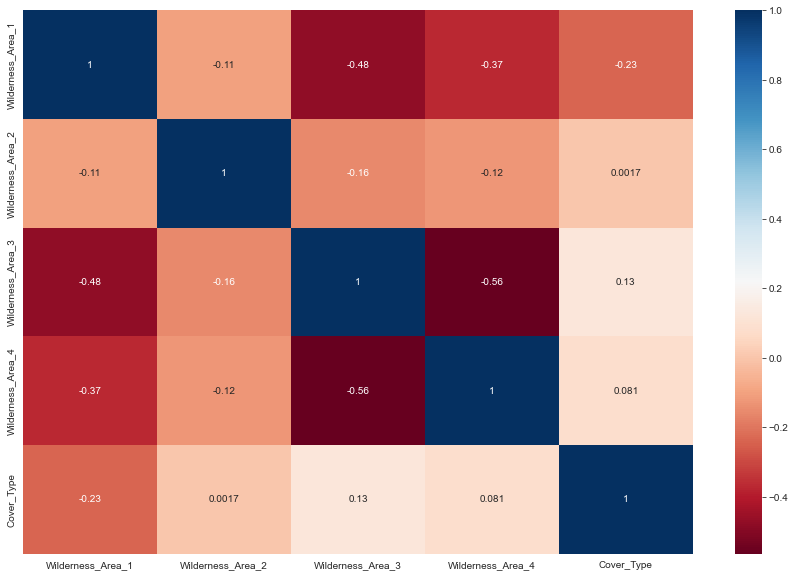

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(df[['Wilderness_Area_1', 'Wilderness_Area_2','Wilderness_Area_3', 'Wilderness_Area_4',
                'Cover_Type']].corr(), annot=True, cmap='RdBu');

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [73]:
# Made some feature engineering above.

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### 1. Import Libraries

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [78]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### 2. Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [79]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

### 3. Implement Support Vector Machines
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [82]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [83]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[4705 1065    7    0  421   75  864]
 [1826 3444  157    4 1297  321   47]
 [   0   14 3429  991  435 2085    0]
 [   0    0  399 6156    0  278    0]
 [ 245 1137  553    0 4795  352    0]
 [   1  313 1120  817  814 4003    0]
 [ 782    1   41    0   21    0 6139]]
              precision    recall  f1-score   support

           1       0.62      0.66      0.64      7137
           2       0.58      0.49      0.53      7096
           3       0.60      0.49      0.54      6954
           4       0.77      0.90      0.83      6833
           5       0.62      0.68      0.65      7082
           6       0.56      0.57      0.56      7068
           7       0.87      0.88      0.87      6984

    accuracy                           0.66     49154
   macro avg       0.66      0.67      0.66     49154
weighted avg       0.66      0.66      0.66     49154


Train_Set
[[18704  4248    27     0  1695   290  3583]
 [ 7180 13772   651    13  5318  1275   175]
 [    0   102 13826  3962 

##### Cross Validation

In [84]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                                 "f1_micro"], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,18.685,0.085,0.667,0.667,0.667,0.667
2,19.716,0.079,0.666,0.666,0.666,0.666
3,27.891,0.104,0.668,0.668,0.668,0.668
4,28.693,0.075,0.668,0.668,0.668,0.668
5,18.997,0.077,0.666,0.666,0.666,0.666


In [85]:
df_scores.mean()[2:]

test_accuracy          0.667
test_precision_micro   0.667
test_recall_micro      0.667
test_f1_micro          0.667
dtype: float64

In [86]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('SVC', LinearSVC(random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'SVC': LinearSVC(random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'SVC__C': 1.0,
 'SVC__class_weight': None,
 'SVC__dual': True,
 'SVC__fit_intercept': True,
 'SVC__intercept_scaling': 1,
 'SVC__loss': 'squared_hinge',
 'SVC__max_iter': 1000,
 'SVC__multi_class': 'ovr',
 'SVC__penalty': 'l2',
 'SVC__random_state': 42,
 'SVC__tol': 0.0001,
 'SVC__verbose': 0}

##### Finding the Best Parameters with GridSearchCV

In [87]:
param_grid = {'SVC__C': [0.01, 0.1, 1],
              'SVC__penalty': ['l1', 'l2'],
             'SVC__class_weight': [None, 'balanced']}

In [88]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="accuracy", cv=5)

In [89]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', LinearSVC(random_state=42))]),
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__class_weight': [None, 'balanced'],
                         'SVC__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [90]:
svm_model_grid.best_params_

{'SVC__C': 1, 'SVC__class_weight': 'balanced', 'SVC__penalty': 'l2'}

In [91]:
svm_model_grid.best_index_

11

In [132]:
svm_model_grid.best_score_

0.6671227140241683

In [131]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[4695 1072    7    0  423   75  865]
 [1819 3447  157    4 1298  323   48]
 [   0   14 3446 1004  434 2056    0]
 [   0    0  394 6168    0  271    0]
 [ 243 1134  556    0 4796  353    0]
 [   1  313 1135  822  813 3984    0]
 [ 769    1   41    0   21    0 6152]]
              precision    recall  f1-score   support

           1       0.62      0.66      0.64      7137
           2       0.58      0.49      0.53      7096
           3       0.60      0.50      0.54      6954
           4       0.77      0.90      0.83      6833
           5       0.62      0.68      0.65      7082
           6       0.56      0.56      0.56      7068
           7       0.87      0.88      0.88      6984

    accuracy                           0.67     49154
   macro avg       0.66      0.67      0.66     49154
weighted avg       0.66      0.67      0.66     49154


Train_Set
[[18654  4265    27     0  1700   293  3608]
 [ 7144 13791   657    13  5329  1273   177]
 [    0   101 13887  4002 

In [94]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(C=1, class_weight="balanced", penalty='l2', 
                                                            random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                                 "f1_micro"], cv = 5)
df_scores_svc = pd.DataFrame(scores, index = range(1, 6))
df_scores_svc.mean()[2:]

test_accuracy          0.667
test_precision_micro   0.667
test_recall_micro      0.667
test_f1_micro          0.667
dtype: float64

In [107]:
y_pred_svm = svm_model_grid.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_svm, 'Residual': y_test-y_pred_svm}
svm_f1 = f1_score(y_test, y_pred_svm, average='micro')
svm_recall = recall_score(y_test, y_pred_svm, average='micro')
compare_svm = pd.DataFrame(my_dict)

In [129]:
comp_sample_svm = compare_svm.sample(20)
comp_sample_svm

,Actual,Pred,Residual
193566,7,7,0
121407,4,4,0
186403,5,5,0
234529,7,7,0
208514,5,5,0
134478,5,5,0
200489,1,1,0
244265,2,2,0
183338,1,1,0
80921,1,5,-4


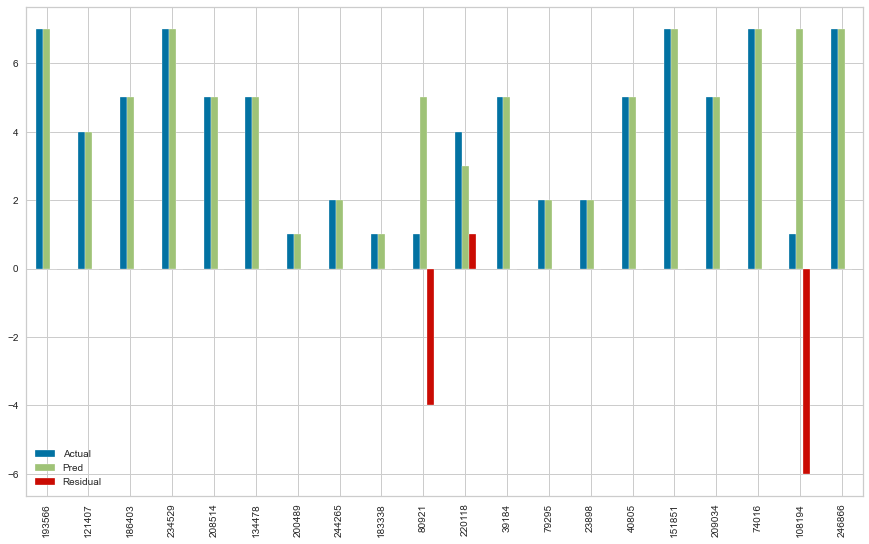

In [130]:
comp_sample_svm.plot(kind='bar',figsize=(15,9))
plt.show()

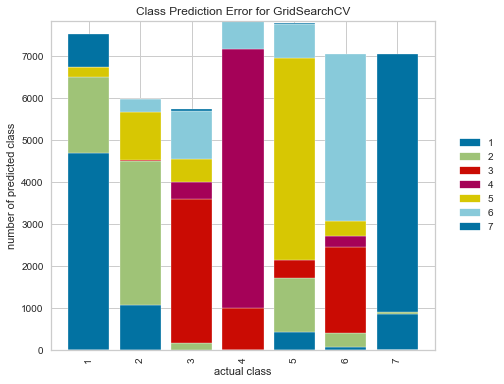

In [110]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [111]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

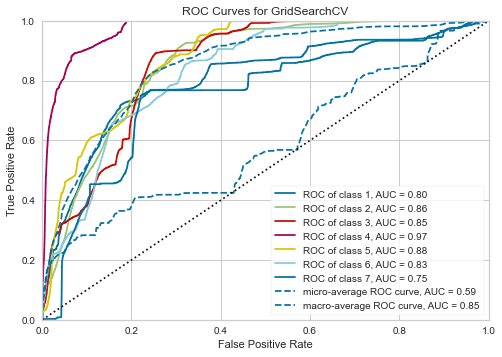

In [112]:
from yellowbrick.classifier import ROCAUC

model = svm_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show(); 

In [128]:
df_scores_svc

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,24.290,0.091,0.668,0.668,0.668,0.668
2,24.497,0.086,0.666,0.666,0.666,0.666
3,22.986,0.099,0.668,0.668,0.668,0.668
4,25.869,0.084,0.667,0.667,0.667,0.667
5,26.041,0.095,0.667,0.667,0.667,0.667


### 4. Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [133]:
DT_model = DecisionTreeClassifier(random_state=101)

In [134]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [135]:
y_pred_tree = DT_model.predict(X_test)

In [136]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[5836 1077    4    0   44    6  170]
 [1111 5566  101    0  212   90   16]
 [   0   80 6395   71   17  391    0]
 [   0    1   44 6750    0   38    0]
 [  26   97   17    0 6934    7    1]
 [   5   60  299   35   12 6657    0]
 [  82   14    0    0    0    0 6888]]
              precision    recall  f1-score   support

           1       0.83      0.82      0.82      7137
           2       0.81      0.78      0.80      7096
           3       0.93      0.92      0.93      6954
           4       0.98      0.99      0.99      6833
           5       0.96      0.98      0.97      7082
           6       0.93      0.94      0.93      7068
           7       0.97      0.99      0.98      6984

    accuracy                           0.92     49154
   macro avg       0.92      0.92      0.92     49154
weighted avg       0.92      0.92      0.92     49154


Train_Set
[[28547     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27817     0 

##### Cross Validation

In [137]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.596,0.046,0.914,0.914,0.914,0.914
2,2.551,0.039,0.915,0.915,0.915,0.915
3,2.532,0.039,0.909,0.909,0.909,0.909
4,2.516,0.040,0.913,0.913,0.913,0.913
5,2.524,0.039,0.914,0.914,0.914,0.914
6,2.600,0.039,0.916,0.916,0.916,0.916
7,2.543,0.039,0.917,0.917,0.917,0.917
8,2.548,0.038,0.913,0.913,0.913,0.913
9,2.506,0.040,0.913,0.913,0.913,0.913
10,2.567,0.038,0.912,0.912,0.912,0.912


In [138]:
df_scores.mean()[2:]

test_accuracy          0.914
test_precision_micro   0.914
test_recall_micro      0.914
test_f1_micro          0.914
dtype: float64

##### Finding the Best Parameters with GridSearchCV

In [139]:
model = DecisionTreeClassifier(random_state=101)
param_grid = {"splitter":["best","random"],
              "max_features":[None,"auto","log2",2,3,4],
              "max_depth": [None, 2,3,4,5]}

In [140]:
dt_model_grid = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=5,
                          n_jobs = -1)

In [141]:
dt_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [142]:
dt_model_grid.best_params_

{'max_depth': None, 'max_features': None, 'splitter': 'best'}

In [143]:
eval_metric(dt_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[5836 1077    4    0   44    6  170]
 [1111 5566  101    0  212   90   16]
 [   0   80 6395   71   17  391    0]
 [   0    1   44 6750    0   38    0]
 [  26   97   17    0 6934    7    1]
 [   5   60  299   35   12 6657    0]
 [  82   14    0    0    0    0 6888]]
              precision    recall  f1-score   support

           1       0.83      0.82      0.82      7137
           2       0.81      0.78      0.80      7096
           3       0.93      0.92      0.93      6954
           4       0.98      0.99      0.99      6833
           5       0.96      0.98      0.97      7082
           6       0.93      0.94      0.93      7068
           7       0.97      0.99      0.98      6984

    accuracy                           0.92     49154
   macro avg       0.92      0.92      0.92     49154
weighted avg       0.92      0.92      0.92     49154


Train_Set
[[28547     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27817     0 

In [144]:
model = DecisionTreeClassifier(max_depth=None, max_features=None, splitter='best', random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 10)
df_scores_tree = pd.DataFrame(scores, index = range(1, 11))
df_scores_tree

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.611,0.047,0.914,0.914,0.914,0.914
2,2.589,0.048,0.915,0.915,0.915,0.915
3,2.687,0.046,0.909,0.909,0.909,0.909
4,2.563,0.047,0.913,0.913,0.913,0.913
5,2.545,0.041,0.914,0.914,0.914,0.914
6,2.555,0.046,0.916,0.916,0.916,0.916
7,2.589,0.045,0.917,0.917,0.917,0.917
8,2.510,0.044,0.913,0.913,0.913,0.913
9,2.532,0.046,0.913,0.913,0.913,0.913
10,2.543,0.048,0.912,0.912,0.912,0.912


In [145]:
df_scores_tree.mean()[2:]

test_accuracy          0.914
test_precision_micro   0.914
test_recall_micro      0.914
test_f1_micro          0.914
dtype: float64

In [146]:
y_pred_tree = dt_model_grid.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_tree, 'Residual': y_test-y_pred_tree}
compare_tree = pd.DataFrame(my_dict)
tree_f1 = f1_score(y_test, y_pred_tree, average='micro')
tree_recall = recall_score(y_test, y_pred_tree, average='micro')

In [147]:
comp_sample_tree = compare_tree.sample(20)
comp_sample_tree

,Actual,Pred,Residual
65709,7,7,0
134986,4,4,0
187229,6,6,0
181243,6,6,0
26142,2,2,0
160104,3,3,0
125118,3,3,0
79712,3,3,0
143013,3,2,1
141154,1,5,-4


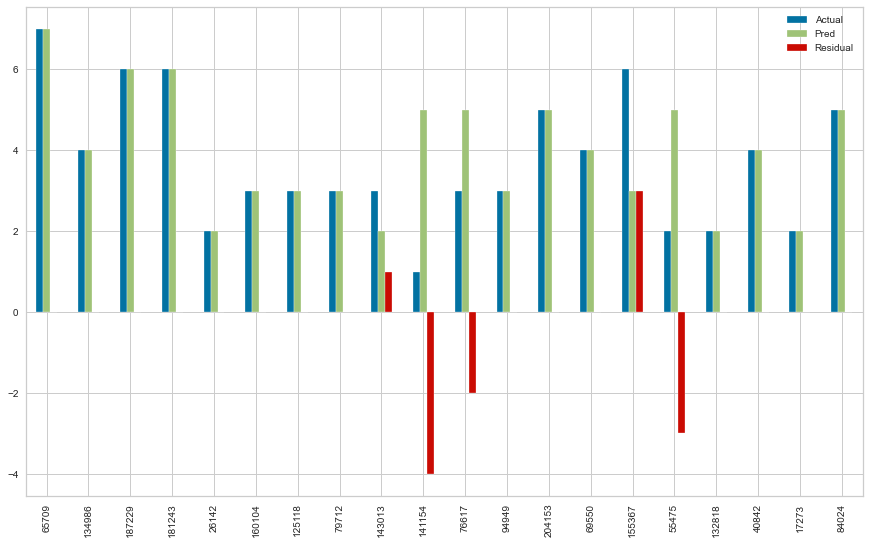

In [148]:
comp_sample_tree.plot(kind='bar',figsize=(15,9))
plt.show()

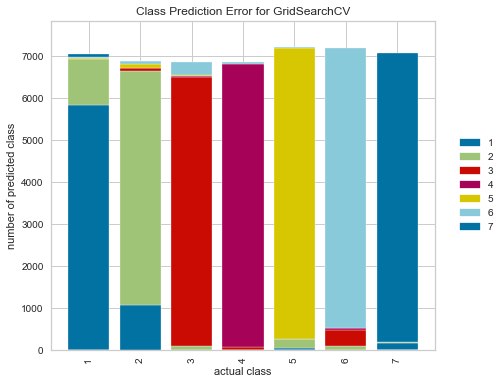

In [149]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

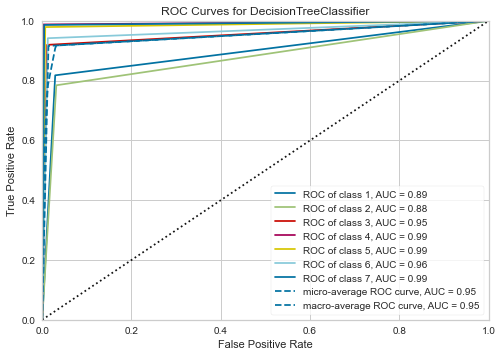

In [150]:
from yellowbrick.classifier import ROCAUC

dt_model = DecisionTreeClassifier(max_depth=None, max_features=None, splitter='best', random_state=101)
visualizer = ROCAUC(dt_model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show(); 

In [151]:
df_scores_tree

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.611,0.047,0.914,0.914,0.914,0.914
2,2.589,0.048,0.915,0.915,0.915,0.915
3,2.687,0.046,0.909,0.909,0.909,0.909
4,2.563,0.047,0.913,0.913,0.913,0.913
5,2.545,0.041,0.914,0.914,0.914,0.914
6,2.555,0.046,0.916,0.916,0.916,0.916
7,2.589,0.045,0.917,0.917,0.917,0.917
8,2.510,0.044,0.913,0.913,0.913,0.913
9,2.532,0.046,0.913,0.913,0.913,0.913
10,2.543,0.048,0.912,0.912,0.912,0.912


### 5. Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[6126  808    4    0   50    5  144]
 [ 802 5899   99    0  176  106   14]
 [   0    6 6516   78   12  342    0]
 [   0    0    7 6811    0   15    0]
 [   2   21   12    0 7040    7    0]
 [   0    9  155   39    4 6861    0]
 [  34    3    0    0    0    0 6947]]
              precision    recall  f1-score   support

           1       0.88      0.86      0.87      7137
           2       0.87      0.83      0.85      7096
           3       0.96      0.94      0.95      6954
           4       0.98      1.00      0.99      6833
           5       0.97      0.99      0.98      7082
           6       0.94      0.97      0.95      7068
           7       0.98      0.99      0.99      6984

    accuracy                           0.94     49154
   macro avg       0.94      0.94      0.94     49154
weighted avg       0.94      0.94      0.94     49154


Train_Set
[[28547     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27817     0 

##### Cross Validation

In [154]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,32.750,1.483,0.935,0.935,0.935,0.935
2,35.100,1.492,0.935,0.935,0.935,0.935
3,33.558,1.597,0.936,0.936,0.936,0.936
4,41.764,2.318,0.937,0.937,0.937,0.937
5,46.642,1.614,0.936,0.936,0.936,0.936


In [155]:
df_scores.mean()[2:]

test_accuracy          0.936
test_precision_micro   0.936
test_recall_micro      0.936
test_f1_micro          0.936
dtype: float64

##### Finding the Best Parameters with GridSearchCV

In [156]:
# These parameters are very limited. This is because the model takes too long to complete.

In [157]:
param_grid = {'n_estimators':[64, 100, 128],
             'max_features':[2, "auto"],
             'max_depth':[None, 3, 5]}

In [158]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_model_grid = GridSearchCV(model, param_grid, scoring = "f1_micro", n_jobs = -1).fit(X_train, y_train)
# I didn't add cv into the model due to time restrictions.

In [159]:
rf_model_grid.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 128}

In [160]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[6144  782    4    0   53    4  150]
 [ 810 5898   93    1  178  103   13]
 [   0    6 6508   80   12  348    0]
 [   0    0    7 6811    0   15    0]
 [   2   23   13    0 7038    6    0]
 [   0   11  158   40    4 6855    0]
 [  33    3    0    0    0    0 6948]]
              precision    recall  f1-score   support

           1       0.88      0.86      0.87      7137
           2       0.88      0.83      0.85      7096
           3       0.96      0.94      0.95      6954
           4       0.98      1.00      0.99      6833
           5       0.97      0.99      0.98      7082
           6       0.94      0.97      0.95      7068
           7       0.98      0.99      0.99      6984

    accuracy                           0.94     49154
   macro avg       0.94      0.94      0.94     49154
weighted avg       0.94      0.94      0.94     49154


Train_Set
[[28547     0     0     0     0     0     0]
 [    0 28384     0     0     0     0     0]
 [    0     0 27817     0 

In [161]:
model = RandomForestClassifier(class_weight = "balanced", n_estimators=128, random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 5)
df_scores_rf = pd.DataFrame(scores, index = range(1, 6))
df_scores_rf

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,44.471,2.093,0.935,0.935,0.935,0.935
2,42.061,1.971,0.936,0.936,0.936,0.936
3,42.989,1.942,0.936,0.936,0.936,0.936
4,40.590,1.887,0.938,0.938,0.938,0.938
5,43.812,1.923,0.935,0.935,0.935,0.935


In [162]:
df_scores_rf.mean()[2:]

test_accuracy          0.936
test_precision_micro   0.936
test_recall_micro      0.936
test_f1_micro          0.936
dtype: float64

In [164]:
y_pred_rf = rf_model_grid.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_rf, 'Residual': y_test-y_pred_rf}
compare_rf = pd.DataFrame(my_dict)
rf_f1 = f1_score(y_test, y_pred_rf, average='micro')
rf_recall = recall_score(y_test, y_pred_rf, average='micro')

In [167]:
comp_sample_rf = compare_rf.sample(20)
comp_sample_rf

,Actual,Pred,Residual
240465,5,5,0
168378,7,7,0
7839,1,1,0
181842,2,2,0
154677,7,7,0
83839,4,4,0
7799,5,5,0
151953,3,3,0
128606,6,6,0
194945,1,1,0


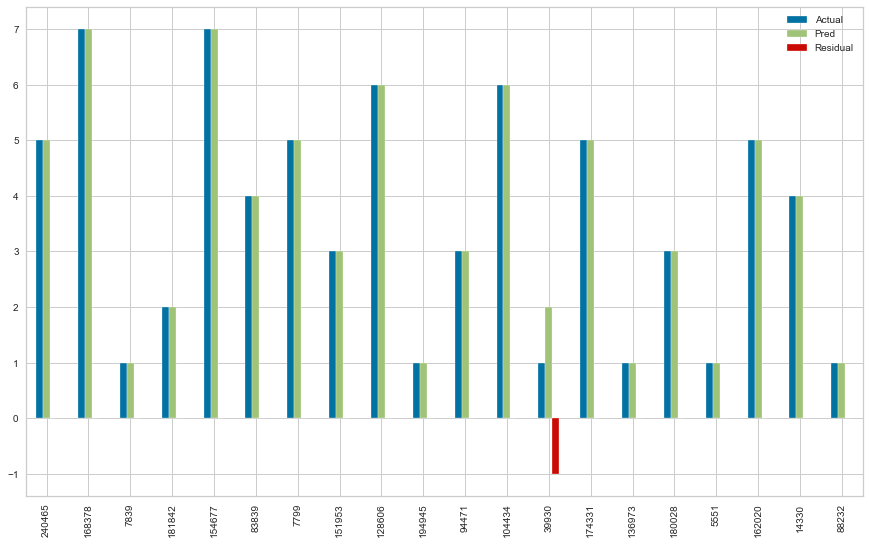

In [168]:
comp_sample_rf.plot(kind='bar',figsize=(15,9))
plt.show()

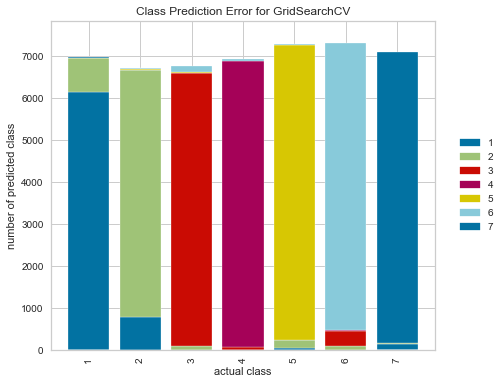

In [169]:
visualizer = ClassPredictionError(rf_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

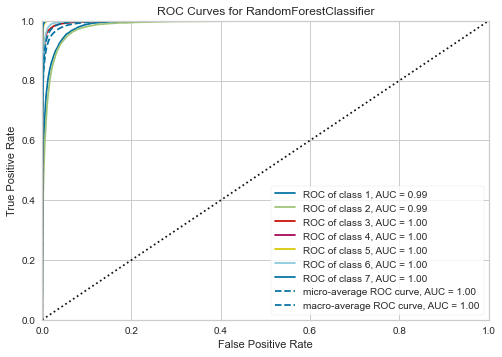

In [170]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier(class_weight = "balanced", n_estimators=128, random_state=101)
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show(); 

In [171]:
df_scores_rf

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,44.471,2.093,0.935,0.935,0.935,0.935
2,42.061,1.971,0.936,0.936,0.936,0.936
3,42.989,1.942,0.936,0.936,0.936,0.936
4,40.590,1.887,0.938,0.938,0.938,0.938
5,43.812,1.923,0.935,0.935,0.935,0.935


### 6. Implement XGBoost Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [174]:
from xgboost import XGBClassifier

In [175]:
xgb_model = XGBClassifier(random_state=101)

In [177]:
xgb_model.fit(X_train,y_train)
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

[23:32:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[5767  995    4    0  103    6  262]
 [1207 5269  105    0  368  125   22]
 [   0   13 5935  118   30  858    0]
 [   0    0   13 6797    0   23    0]
 [  11   70   36    0 6940   25    0]
 [   1   25  385   53   31 6573    0]
 [  62    2    0    0    2    0 6918]]
              precision    recall  f1-score   support

           1       0.82      0.81      0.81      7137
           2       0.83      0.74      0.78      7096
           3       0.92      0.85      0.88      6954
           4       0.98      0.99      0.99      6833
           5       0.93      0.98      0.95      7082
           6       0.86      0.93      0.90      7068
           7       0.96      0.99      0.98      6984

    accuracy                         

#### Cross Validation

In [ ]:
# I didn't run this model due to time restrictions.

model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", 
                                                            "f1_micro"], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

In [ ]:
df_scores.mean()[2:]

##### Finding the Best Parameters with GridSearchCV

In [ ]:
# I didn't run the GridSearchCV due to time restrictions.

param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=101)

In [ ]:
xgb_model_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1_micro", n_jobs = -1).fit(X_train, y_train)
# I didn't add cv into the model due to time restrictions.

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_grid.best_score_

In [ ]:
##########################

In [178]:
y_pred_xgb = xgb_model.predict(X_test)
my_dict = {'Actual': y_test, 'Pred': y_pred_xgb, 'Residual': y_test-y_pred_xgb}
compare_xgb = pd.DataFrame(my_dict)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='micro')
xgb_recall = recall_score(y_test, y_pred_xgb, average='micro')

In [179]:
comp_sample_xgb = compare_xgb.sample(20)
comp_sample_xgb

,Actual,Pred,Residual
20418,1,1,0
31926,3,3,0
187179,5,5,0
54350,2,2,0
57135,6,6,0
224190,1,1,0
29143,3,3,0
207256,3,3,0
226765,2,1,1
224906,4,4,0


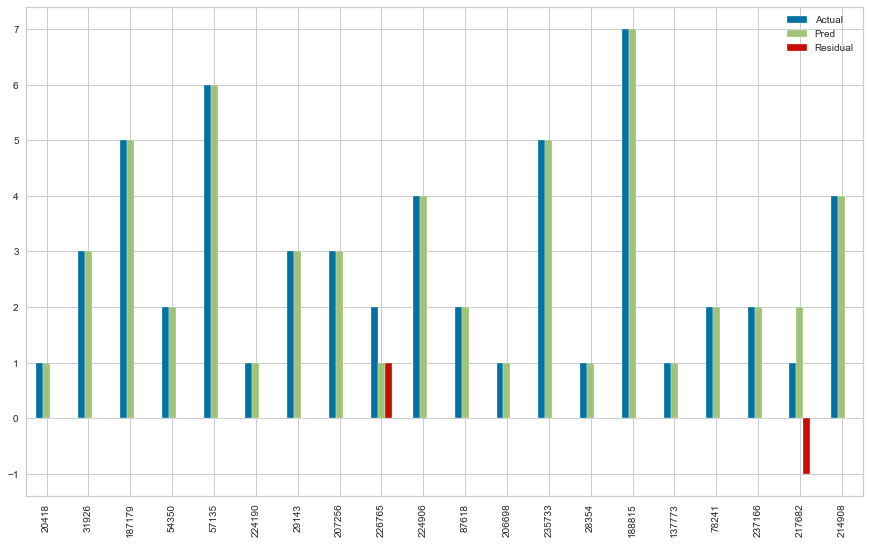

In [180]:
comp_sample_xgb.plot(kind='bar',figsize=(15,9))
plt.show()

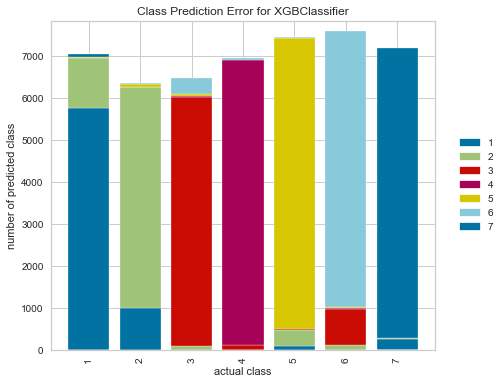

In [181]:
visualizer = ClassPredictionError(xgb_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

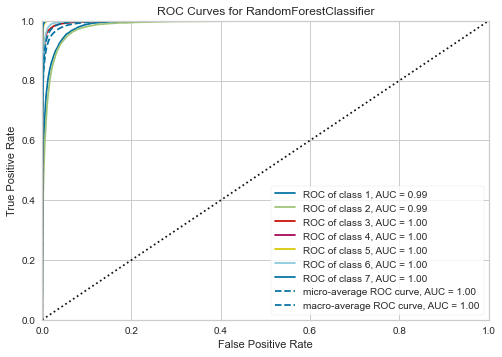

In [182]:
from yellowbrick.classifier import ROCAUC

xgb_model = XGBClassifier(random_state=101)
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show(); 

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

In [208]:
svc_res = pd.DataFrame(df_scores_svc.mean()[2:], columns=['SVC'])
tree_res = pd.DataFrame(df_scores_tree.mean()[2:], columns=['Decision Tree'])
rf_res = pd.DataFrame(df_scores_rf.mean()[2:], columns=['Random Forest'])
xgb_res = pd.DataFrame({'XGBoost': xgb_accuracy}, index=['test_accuracy'])

In [209]:
pd.merge(svc_res.iloc[:,0], tree_res.iloc[:,0], left_index=True, right_index=True).merge(rf_res.iloc[:,0],
            left_index=True, right_index=True).merge(xgb_res.iloc[:,0],left_index=True, right_index=True)

,SVC,Decision Tree,Random Forest,XGBoost
test_accuracy,0.667,0.914,0.936,0.899


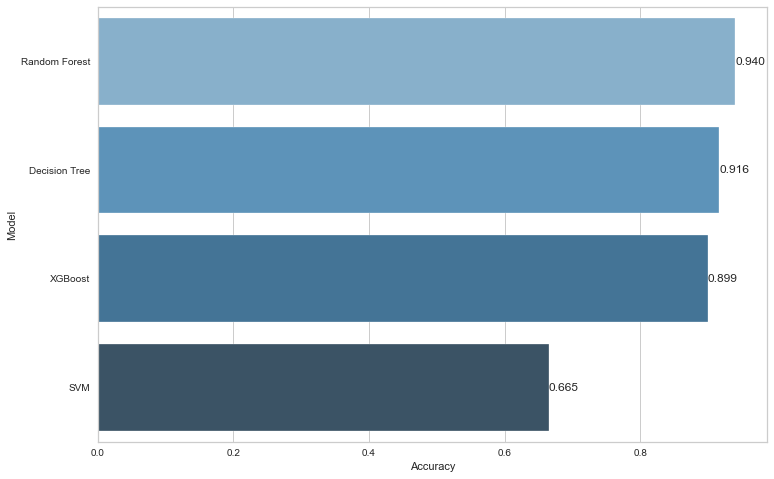

In [214]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "Accuracy": [svm_f1, tree_f1, rf_f1, xgb_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(12,8))
plt.subplot(111)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# F1 Score Comparison

Since the target label is balanced, I used accuracy as the performance metric. Therefore, accuracy, f1_micro, recall_micro, and precision_micro are all the same.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___